In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
factor_data=pd.read_excel('factor_pricing_data_weekly.xlsx', sheet_name='factors (excess returns)')
factor_data.set_index('Date',inplace=True)
spx_returns=pd.read_excel('spx_returns_weekly.xlsx', sheet_name='benchmark rets')



In [9]:
spx_returns.head()
#factor_data.head()

,date,SPY,BTC,USO,TLT,IEF,IYR,GLD
0,2015-01-09,-0.005744,-0.079179,-0.080945,0.029453,0.013517,0.029953,0.027875
1,2015-01-16,-0.012827,-0.281115,0.002735,0.016175,0.010188,0.019471,0.044858
2,2015-01-23,0.016565,0.137612,-0.072559,0.011863,0.001558,0.007958,0.013957
3,2015-01-30,-0.026931,-0.030969,0.048235,0.026044,0.011992,-0.013361,-0.006279
4,2015-02-06,0.030584,-0.027431,0.092593,-0.051020,-0.022724,-0.013173,-0.038963


In [20]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
df = pd.read_excel('spx_returns_weekly.xlsx', sheet_name='benchmark rets')
market = df['SPY']  # market excess return
asset_cols = [c for c in df.columns if c not in ['date', 'SPY']]  # BTC, USO, TLT, IEF, IYR, GLD

# --- Parameters ---
Scale_factor = 52  # for weekly returns to annualized
betas = pd.Series(index=asset_cols, dtype=float)
alphas = pd.Series(index=asset_cols, dtype=float)
residuals = pd.DataFrame(columns=asset_cols)

for asset in asset_cols:
    y = df[asset]
    X = sm.add_constant(market)  # intercept + market
    model = sm.OLS(y, X).fit()
    alphas[asset] = model.params['const']
    betas[asset] = model.params['SPY']
    residuals[asset] = y - (alphas[asset] + betas[asset] * market)

sample_mean = df[asset_cols].mean() * Scale_factor
annualized_alphas = alphas * Scale_factor
treynor = sample_mean / betas
tracking_error = residuals.std() * np.sqrt(Scale_factor)
info_ratio = annualized_alphas / tracking_error

In [21]:
treynor = sample_mean / betas
tracking_error = residuals.std() * np.sqrt(Scale_factor)
info_ratio = annualized_alphas / tracking_error

In [22]:
df_CAPM = pd.DataFrame({
    "Alpha (Annualized)": annualized_alphas,
    "Beta": betas,
    "Treynor": treynor,
    "Information Ratio": info_ratio,
    "Sample Risk Premium": sample_mean
})

print(df_CAPM)

# Mean Absolute Alpha (annualized)
mean_abs_alpha = annualized_alphas.abs().mean()
print(f"\nAnnualized Mean Absolute Alpha: {mean_abs_alpha:.6f}")


     Alpha (Annualized)      Beta   Treynor  Information Ratio  \
BTC            0.698381  0.720483  1.100587           1.041293   
USO           -0.088663  0.656576 -0.003774          -0.237640   
TLT            0.005476 -0.067109  0.049659           0.038048   
IEF            0.013851 -0.026795 -0.385651           0.212351   
IYR           -0.053805  0.951895  0.074740          -0.375419   
GLD            0.091398  0.112144  0.946273           0.644674   

     Sample Risk Premium  
BTC             0.792955  
USO            -0.002478  
TLT            -0.003333  
IEF             0.010333  
IYR             0.071145  
GLD             0.106118  

Annualized Mean Absolute Alpha: 0.158596


/var/folders/rl/1p19jmyj1k357sd_cr_qw2yh0000gn/T/ipykernel_54282/1941352930.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(df_CAPM['Beta'][i] + 0.01, df_CAPM['Sample Risk Premium'][i], asset, fontsize=9)


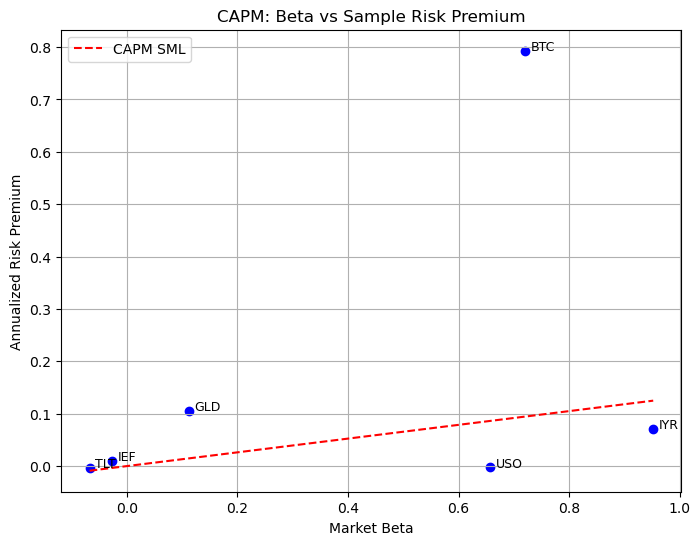

In [24]:
plt.figure(figsize=(8,6))
plt.scatter(df_CAPM['Beta'], df_CAPM['Sample Risk Premium'], color='blue')

# Annotate assets
for i, asset in enumerate(df_CAPM.index):
    plt.text(df_CAPM['Beta'][i] + 0.01, df_CAPM['Sample Risk Premium'][i], asset, fontsize=9)

# Optional: CAPM Security Market Line
market_premium = df['SPY'].mean() * Scale_factor
x_vals = np.linspace(df_CAPM['Beta'].min(), df_CAPM['Beta'].max(), 100)
y_vals = x_vals * market_premium
plt.plot(x_vals, y_vals, linestyle='--', color='red', label='CAPM SML')

plt.xlabel('Market Beta')
plt.ylabel('Annualized Risk Premium')
plt.title('CAPM: Beta vs Sample Risk Premium')
plt.legend()
plt.grid(True)
plt.show()


In [30]:
factor_data.head()
df_excess_ret = pd.read_excel('spx_returns_weekly.xlsx', sheet_name='benchmark rets')
df_excess_ret.head()

,date,SPY,BTC,USO,TLT,IEF,IYR,GLD
0,2015-01-09,-0.005744,-0.079179,-0.080945,0.029453,0.013517,0.029953,0.027875
1,2015-01-16,-0.012827,-0.281115,0.002735,0.016175,0.010188,0.019471,0.044858
2,2015-01-23,0.016565,0.137612,-0.072559,0.011863,0.001558,0.007958,0.013957
3,2015-01-30,-0.026931,-0.030969,0.048235,0.026044,0.011992,-0.013361,-0.006279
4,2015-02-06,0.030584,-0.027431,0.092593,-0.051020,-0.022724,-0.013173,-0.038963


In [35]:
df_excess_ret = pd.read_excel('spx_returns_weekly.xlsx', sheet_name='benchmark rets')
factors = pd.read_excel('factor_pricing_data_weekly.xlsx', sheet_name='factors (excess returns)')


In [37]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Read Excel files
df_excess_ret = pd.read_excel('spx_returns_weekly.xlsx', sheet_name='benchmark rets')
factors = pd.read_excel('factor_pricing_data_weekly.xlsx', sheet_name='factors (excess returns)')

# Strip column names
df_excess_ret.columns = df_excess_ret.columns.str.strip()
factors.columns = factors.columns.str.strip()

# Convert date columns to datetime
df_excess_ret['date'] = pd.to_datetime(df_excess_ret['date'])
factors['Date'] = pd.to_datetime(factors['Date'])

# Set date as index
df_excess_ret = df_excess_ret.set_index('date')
factors = factors.set_index('Date')

# Align dates
common_dates = df_excess_ret.index.intersection(factors.index)
df_excess_ret = df_excess_ret.loc[common_dates].dropna(how='any')
factors = factors.loc[common_dates].dropna(how='any')

# Annualization factor
Scale_factor = 52  # weekly

# Define factor models
models = {
    "CAPM": ['MKT'],
    "FF3": ['MKT', 'SMB', 'HML'],
    "4F": ['MKT', 'HML', 'RMW', 'UMD']
}

results_alphas = {}

for model_name, factor_list in models.items():
    alphas = pd.Series(index=df_excess_ret.columns, dtype=float)
    
    X = sm.add_constant(factors[factor_list])  # add intercept
    for asset in df_excess_ret.columns:
        y = df_excess_ret[asset]
        model = sm.OLS(y, X).fit()
        alphas[asset] = model.params['const']
    
    # Annualized mean absolute alpha
    ann_mean_abs_alpha = (alphas.abs().mean()) * Scale_factor
    results_alphas[model_name] = ann_mean_abs_alpha
    print(f"{model_name} annualized mean absolute alpha: {ann_mean_abs_alpha:.6f}")

# Optional: create summary table
summary_df = pd.Series(results_alphas, name="Annualized Mean Abs Alpha").to_frame()
print(summary_df)


CAPM annualized mean absolute alpha: 0.135922
FF3 annualized mean absolute alpha: 0.137112
4F annualized mean absolute alpha: 0.136596
      Annualized Mean Abs Alpha
CAPM                   0.135922
FF3                    0.137112
4F                     0.136596
